<h1 style="color: #AA1358;">ML Preprocessing</h1>

<h2 style="color: #A4064D;">Libraries</h2>

In [1]:
## Basic libraries
import pandas as pd 
import numpy as np 

## EDA Libraries
import matplotlib.pyplot as plt
import seaborn as sns

## Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h2 style="color: #A4064D;">Loading Data</h2>

In [2]:
data = pd.read_csv('data/for_eda.csv').drop(columns=['Unnamed: 0']) 
df = data.copy()

# Display the first 10 rows of the DataFrame
df.head(10)


,id,age,education,marital_status,income,childrenhome,dt_customer,recency,wine_products,fruit_products,meat_products,fish_products,sweet_products,gold_products,total_products,deal_purchases,web_purchases,catalog_purchases,store_purchases,total_purchases,web_visits_permonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,total_cmp,complain,response
0,5524,67,Graduation,Single,58138.0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,22,7,0,0,0,0,0,0,0,1
1,2174,70,Graduation,Single,46344.0,2,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,4,5,0,0,0,0,0,0,0,0
2,4141,59,Graduation,Together,71613.0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,20,4,0,0,0,0,0,0,0,0
3,6182,40,Graduation,Together,26646.0,1,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,0,0,0,0,0,0,0,0
4,5324,43,PhD,Married,58293.0,1,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,14,5,0,0,0,0,0,0,0,0
5,7446,57,Master,Together,62513.0,1,2013-09-09,16,520,42,98,0,42,14,716,2,6,4,10,20,6,0,0,0,0,0,0,0,0
6,965,53,Graduation,Divorced,55635.0,1,2012-11-13,34,235,65,164,50,49,27,590,4,7,3,7,17,6,0,0,0,0,0,0,0,0
7,6177,39,PhD,Married,33454.0,1,2013-05-08,32,76,10,56,3,1,23,169,2,4,0,4,8,8,0,0,0,0,0,0,0,0
8,4855,50,PhD,Together,30351.0,1,2013-06-06,19,14,0,24,3,3,2,46,1,3,0,2,5,9,0,0,0,0,0,0,0,1
9,5899,74,PhD,Together,5648.0,2,2014-03-13,68,28,0,6,1,1,13,49,1,1,0,0,1,20,1,0,0,0,0,1,0,0


<h3 style="color: #6D183F;">Metadata</h3>

- **AcceptedCmp1** - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- **AcceptedCmp2** - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- **AcceptedCmp3** - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- **AcceptedCmp4** - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- **AcceptedCmp5** - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- **TotalCmp** - sum of capaigns accepted
- **Response** - 1 if customer accepted the offer in the last campaign, 0 otherwise
- **Complain** - 1 if customer complained in the last 2 years
- **DtCustomer** - date of customer’s enrolment with the company
- **Education** - customer’s level of education
- **Marital** - customer’s marital status
- **Kidhome** - number of children in customer's household
- **Income** - customer’s yearly household income
- **MntFishProducts** - amount spent on fish products in the last 2 years
- **MntMeatProducts** - amount spent on meat products in the last 2 years
- **MntFruits** - amount spent on fruits products in the last 2 years
- **MntSweetProducts** - amount spent on sweet products in the last 2 years
- **MntWines** - amount spent on wine products in the last 2 years
- **MntGoldProds** - amount spent on gold products in the last 2 years
- **NumDealsPurchases** - number of purchases made with discount
- **NumCatalogPurchases** - number of purchases made using catalogue
- **NumStorePurchases** - number of purchases made directly in stores
- **NumWebPurchases** - number of purchases made through company’s web site
- **NumWebVisitsMonth** - number of visits to company’s web site in the last month
- **Recency** - number of days since the last purchase

<h3 style="color: #6D183F;">Data Sneak Peak</h3>

In [3]:
# Show some info about the dataset

print("Data Overview:\n")
print(df.info())
print("\nNumber of variables per type:\n")
print(df.dtypes.value_counts())
print("\nNumber of missing values per column:\n")
print(df.isnull().sum())
print("\nDuplicated rows in the dataset:\n")
print(df.duplicated().sum())
print("\nNumber of unique values per column:\n")
print(df.nunique())

Data Overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   2236 non-null   int64  
 1   age                  2236 non-null   int64  
 2   education            2236 non-null   object 
 3   marital_status       2236 non-null   object 
 4   income               2236 non-null   float64
 5   childrenhome         2236 non-null   int64  
 6   dt_customer          2236 non-null   object 
 7   recency              2236 non-null   int64  
 8   wine_products        2236 non-null   int64  
 9   fruit_products       2236 non-null   int64  
 10  meat_products        2236 non-null   int64  
 11  fish_products        2236 non-null   int64  
 12  sweet_products       2236 non-null   int64  
 13  gold_products        2236 non-null   int64  
 14  total_products       2236 non-null   int64  
 15  deal_purchases       2

As we see at the sneak peak, our dataset it's pretty clean (because this csv was preprocessed in a previous project for an exhaustive Marketing Analysis).
- 2236 entries 
- 0 Missing values
- 0 duplicated rows
- Types: 25 integers (6 of them are booleans), 3 objects and 1 float

And for the unique values, we can notice that there are a few binary numerical variables, that should be better if we transform them into categorical booleans. 

In [5]:

# First, let's convert the binary columns to boolean type for better representation
binary_columns = ['acceptedcmp1','acceptedcmp2','acceptedcmp3','acceptedcmp4','acceptedcmp5','complain','response']
df[binary_columns] = df[binary_columns].astype(bool)

# And then, lets see descriptive statistics for numerical and categorical variables
print("\nDescriptive statistics for numerical variables:\n")
num_var = df.select_dtypes(include=['int64', 'float64'])
print(num_var.describe())
print("\nDescriptive statistics for categorical variables:\n")
cat_var = df.select_dtypes(include=['object', 'bool'])  
print(cat_var.describe())


Descriptive statistics for numerical variables:

                 id          age         income  childrenhome      recency  \
count   2236.000000  2236.000000    2236.000000   2236.000000  2236.000000   
mean    5591.551878    55.203488   52228.004249      0.951252    49.147138   
std     3245.240106    11.980604   25053.119141      0.751936    28.954880   
min        0.000000    28.000000    1730.000000      0.000000     0.000000   
25%     2828.250000    47.000000   35502.500000      0.000000    24.000000   
50%     5458.500000    54.000000   51498.500000      1.000000    49.000000   
75%     8427.750000    65.000000   68289.750000      1.000000    74.000000   
max    11191.000000   131.000000  666666.000000      3.000000    99.000000   

       wine_products  fruit_products  meat_products  fish_products  \
count    2236.000000     2236.000000    2236.000000    2236.000000   
mean      303.873435       26.271020     166.924419      37.405188   
std       336.876776       39.761356 

Look into describes about our variables for ML processing, we can notice a few insights:

- We should explore continuous variables in detail through plots. The describe functions give us some clues about outliers that could affect variable distribution.

- **dt_customer** is an object that we need to transform into datatime. Could be good to extract the data year for our model to evaluate

- Variables about **acceptation campaigns** (the binary ones) are extreamly incline to rejection. It seems that it will be better if we earse them.

<h2 style="color: #A4064D;">EDA</h2>

Let's check variable distribution, first numericals and then, categoricals

<h4 style="color: #A4064D;">Numerical Continuous</h2>

In [11]:
def pairplotter(df, hue=None, size=2.5, palette='rocket', corner=True):
    """
    Function to plot pairplot for the DataFrame.
    
    Parameters:
    df (DataFrame): The DataFrame to plot.
    hue (str): Column name to color the points by.
    size (float): Size of the plot.
    palette (str): Color palette for the plot.
    corner (bool): If True, only plot the lower triangle of the pairplot.
    """
    sns.pairplot(df, hue=hue, height=size)
    plt.show()

In [15]:
def boxplotter_all(df, hue=None, palette='rocket', corner=True, figsize=(12, 6)):
    """
    Function to plot boxplot for the DataFrame.
    
    Parameters:
    df (DataFrame): The DataFrame to plot.
    hue (str): Column name to color the boxes by.
    palette (str): Color palette for the plot.
    """
    
    for col in df:
        plt.figure(figsize=(12, 6))
        sns.boxplot(y=col, data=df, hue=hue, palette=palette)
        plt.xticks(rotation=45)
        plt.show()

Dataset context give us a clear classification about our series. In case of continuous ones, there are some variables that speaks about demographics and others about consume behaviour. So let's pairplott them separately

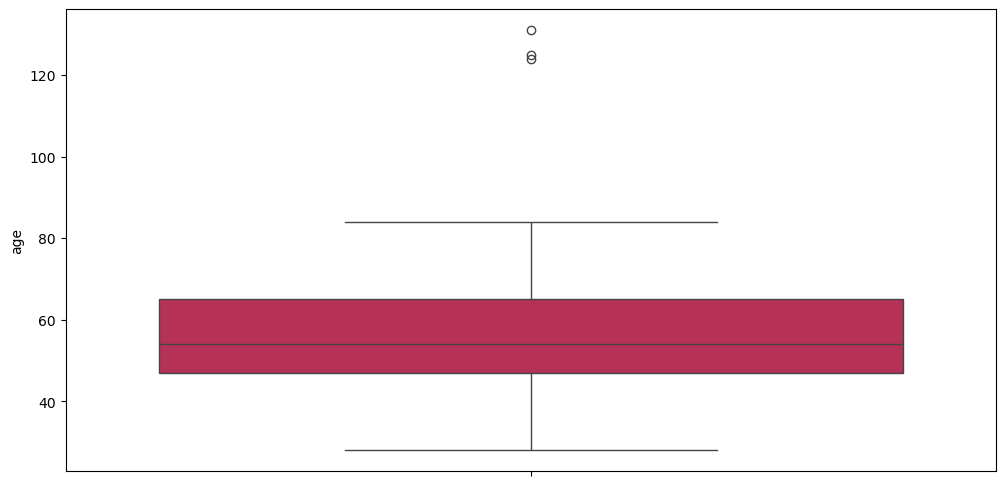

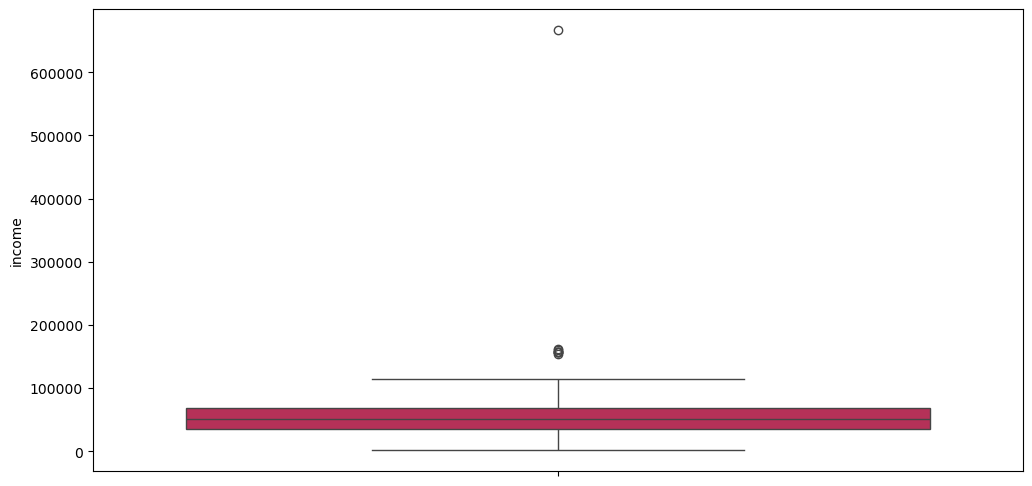

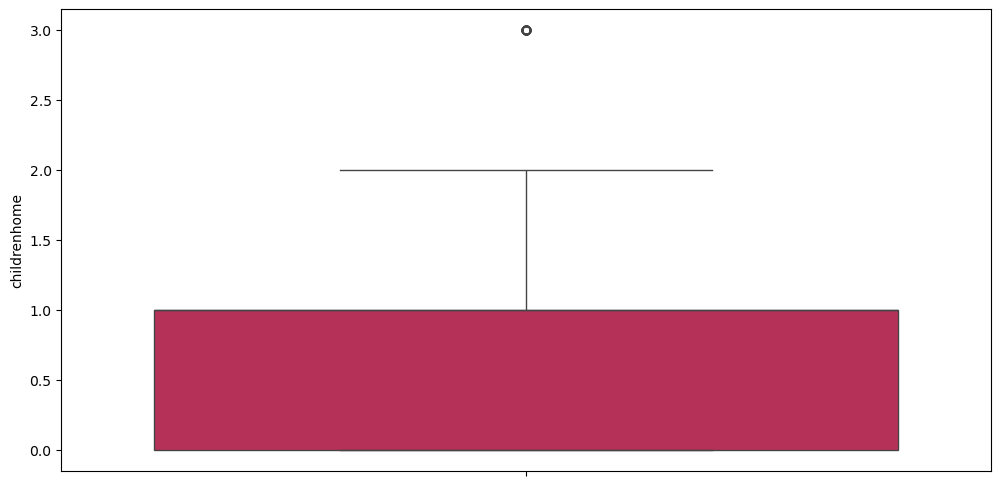

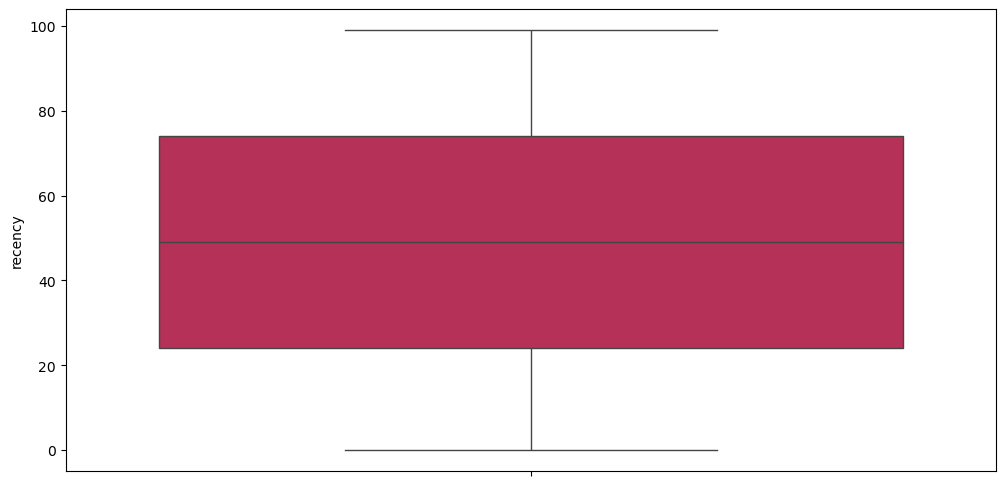

In [16]:
boxplotter_all(num_var[['age', 'income', 'childrenhome', 'recency']])

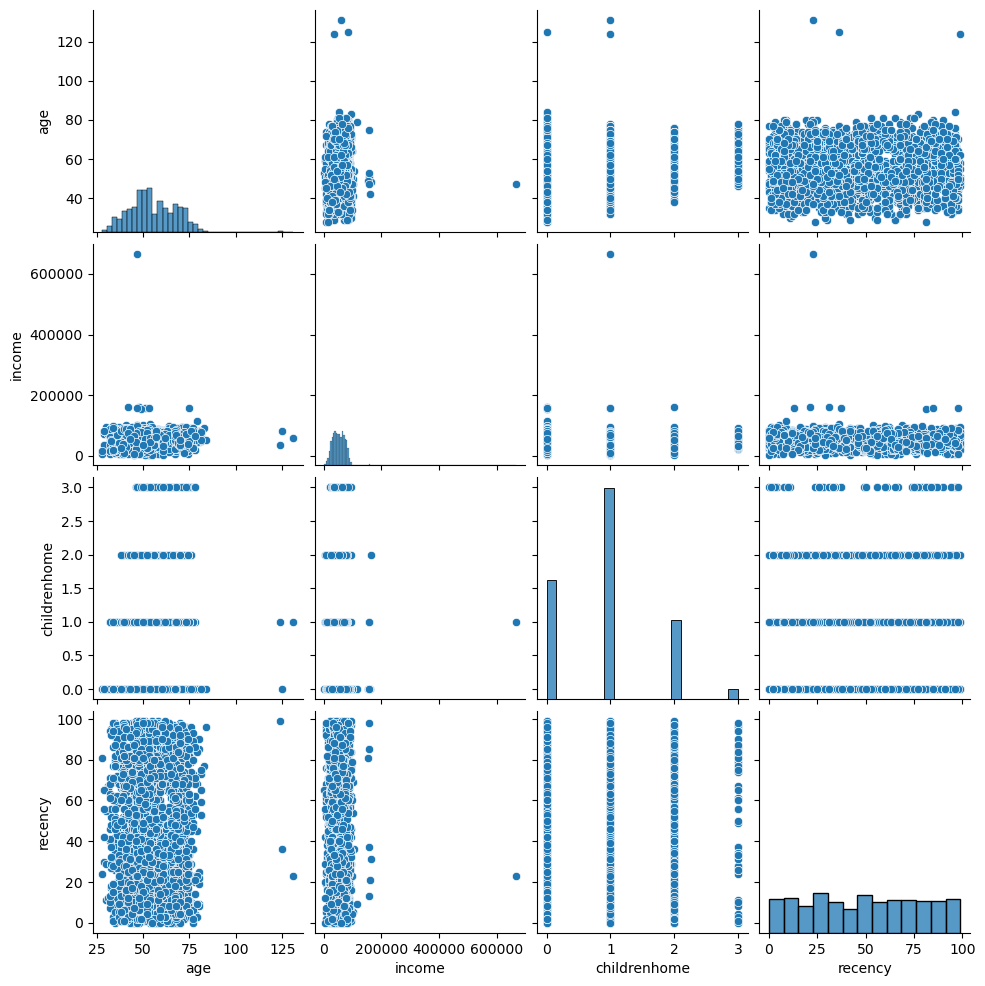

In [12]:
pairplotter(num_var[['age', 'income', 'childrenhome', 'recency']], hue=None, size=2.5)